**4과: 다양한 분류 알고리즘**

로지스틱 회귀

In [1]:
# 4-1) 다양한 분류 알고리즘
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [11]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]

In [13]:
print(fish_input[:5])

   Weight  Length  Diagonal   Height   Width
0   242.0    25.4      30.0  11.5200  4.0200
1   290.0    26.3      31.2  12.4800  4.3056
2   340.0    26.5      31.1  12.3778  4.6961
3   363.0    29.0      33.5  12.7300  4.4555
4   430.0    29.0      34.0  12.4440  5.1340


In [14]:
fish_target=fish['Species'].to_numpy()

In [15]:
from sklearn.model_selection import train_test_split 
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)  

In [ ]:
# StandardScaler 클래스로 전처리 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [18]:
# K-최근접 이웃 분류기로 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [19]:
print(kn.classes_) # target 값이 alphabe순으로 정렬 (2개 이상의 클래스이므로 다중분류)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [21]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [22]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) #클래스별 확률값 반환
print(np.round(proba, decimals=4)) # 소수점 아래 4개 숫자 반환

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


 [0.     0.     0.6667 0.     0.3333 0.     0.    ]

 4번째 sample에서 Perch에 대한 확률이 0.6667, Pike에 대한 확률이 0.3333

In [23]:
distances, indexes = kn.kneighbors(test_scaled[3:4]) # kneighbors()는 입력이 2차원 배열이어야 한다. [3:4]로 4번째 샘플 하나 선택
print(train_target[indexes])
# 결과: 이 샘플의 이웃은 Roach(5번째 클래스)가 1개, Perch(3번째 클래스)가 2개임

[['Roach' 'Perch' 'Perch']]


**로지스틱 회귀**

: 이름은 회귀이지만 분류모델이다. 선형 회귀와 동일하게 선형 방정식을 학습한다.

범위를 0~1로 맞추기 위해 시그모이드 함수를 사용한다.

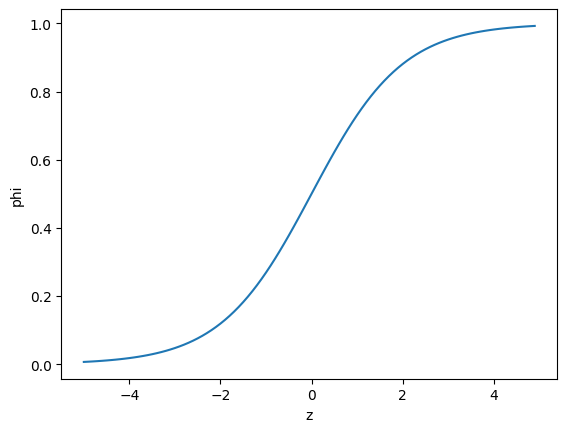

In [24]:
import numpy as np
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

**logistic 회귀로 이진 분류 수행하기**

In [26]:
# 불리언 인덱싱
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])
# A와 C만 True로 만들기

['A' 'C']


**도미와 빙어에 대한 행만 골라내기**

train_target=='Bream' 으로 Bream인 것만 True, 나머지는 False로 반환한다.

In [28]:
bream_smelt_indexes = (train_target=='Bream') | (train_target=='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [30]:
print(lr.predict(train_bream_smelt[:5])) # 처음 5개의 샘플을 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [34]:
print(lr.predict_proba(train_bream_smelt[:5]))
# 첫번째 열이 음성(0)에 대한 확률, 두번째는 양성(1)에 대한 확률
# 두번째 샘플말고 모두 도미로 예측함

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [33]:
print(lr.classes_)
# Bream이 음성, Smelt가 양성

['Bream' 'Smelt']


In [35]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


**z 값 계산**

z값: 분류 모델(특히 선형 분류 모델)에서 결정 함수의 출력 값이다. 이 값은 모델이 각 샘플에 대해 계산한 결정 경계로부터의 거리를 나타내며, 예측할 클래스의 확신도를 평가할 수 있는 기준이 된다.

이를 sigmoid 함수에 통과시켜 확률을 얻는다.

In [37]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [39]:
# sigmoid 함수에 통과시키기
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


**정리**

2진 분류를 위해 2개의 생선 샘플을 고르고 logistic 회귀 모델로 훈련했다.

2진 분류의 경우 predict_proba()  메소드가 음성/양성 클래스에 대한 확률을 출력한다. 

decision_function() 메서드는 양성 클래스에 대한 z값을 계산한다. 

**로지스틱 회귀로 다중 분류 수행하기**

LogisticRegression 클래스는 max_iter 매개변수로 반복적인 알고리즘을 사용한다. 기본값인 100은 부족하면 1000으로 늘리면 된다.

LogisticRegrssion은 Ridge 회귀와 같이 계수의 제곱을 규제한다. ridge에서는 alpha로 규제의 양을 조절했지만 logistic regression에서는 매개변수 C를 이용한다. 

C는 alpha와 반대로 작을수록 규제가 커진다.

In [40]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [43]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [41]:
print(lr.predict(test_scaled[:5])) # test sample의 처음 5개 샘플에 대한 예측

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [42]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


첫번째 열을 보면 3번째 열의 확률이 84.2%로 가장 높다. 

이는 lr.classes_에서 3번째 값인 Perch에 대한 확률이다.

In [44]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


5개의 특성을 사용하므로 coef_ 배열은 열이 5개

행이 7개이다: z를 7개 계산. 즉, 다중 분류는 클래스마다 z값을 하나씩 계산함 -> 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.

**softmax 함수**

이진 분류는 sigmoid 함수로 z 값을 0~1 사이의 값으로 변환했다.

다중 분류는 softmax 함수로 z 값을 확률로 변환한다. 0~1 사이의 값으로 변환하고 전체 합이 1이 되도록 한다.

In [46]:
# test - set의 5개의 sample에 대한 z1~z7의 값을 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [47]:
from scipy.special import softmax
proba = softmax(decision, axis=1) #각 행(sample)에 대해 softmax 계산
print(np.round(proba, decimals=3))
# 결과: 앞에 proba 배열과 일치하다.

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


**정리**

1. lr.predict_proba(test_scaled[:5])는 학습된 모델이 각 클래스에 대해 계산한 확률을 반환한다.

내부적으로 결정 함수의 z값을 계산한 후 softmax 함수를 사용하여 확률로 변환한다.

2. softmax(decision, axis=1)는 decision_function() 메서드를 통해 얻은 z값을 직접 softmax 함수에 적용하여 확률로 변환한다.

이 방식은 predict_proba() 메서드와 동일한 수학적 연산을 수행하지만, 직접 z값을 다룬다.

**4-2) 확률적 경사 하강법**

점진적 학습: 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 더 훈련하여 손실이 최소인 지점을 찾는 것

대표적인 알고리즘: 확률적 경사 하강법

확률적 경사 하강법: 확률적 - train-set에서 랜덤하게 하나의 sample을 고르는 것, 경사 하강 - 원하는 지점으로 내려가는 것

에포크 - 만족할 만한 위치에 도달할 때까지 계속 내려가서 train-set을 한 번 모두 사용하는 과정

미니배치 경사 하강법 - 무작위로 1개씩 말고 몇 개의 샘플을 선택해서 경사를 내려가는 것

배치 경사 하강법 - 전체 샘플을 사용하는 것

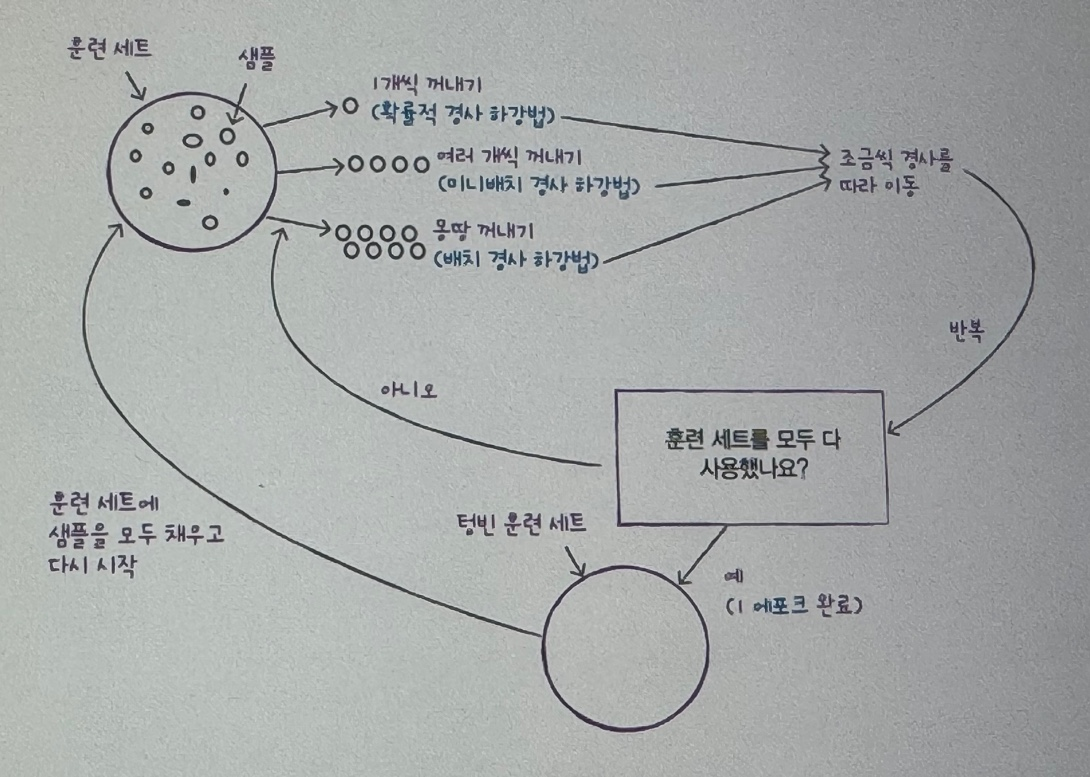

**손실 함수**

알고리즘 평가, 작을수록 좋다

> 손실 함수 vs 비용 함수

손실 함수 - 샘플 하나에 대한 손실

비용 함수 - train-set에 있는 모든 sample에 대한 손실 함수의 합

손실 함수는 경사 하강법을 이용하기 위해 미분가능해야 한다. 

**로지스틱 손실 함수**

sample 4개의 예측 확률이 각각 0.9, 0.3, 0.2, 0.8이라고 가정하자, target 값은 1 1 0 0 이다.

0.9(예측) x 1 (정답/타켓) = -0.9 ; 예측이 1에 가까울 수록 값이 작아짐

0.3(예측) x 1 (정답/타켓) = -0.3

0.8(예측) x 1 (정답/타켓) = -0.8 ; 0.2 x 0이므로 target을 양성 클래스처럼 바꾸기

0.2(예측) x 1 (정답/타켓) = -0.2 ; 가장 손실이 높다(가장 큼) 

예측 확률의 범위는 0~1인데 log 함수는 0~1에서 음수이므로 최종 손실 값이 양수가 된다.

-> 실제 label이 y=1이고 예측 확률이 0.8이면 loss는 -log(0.8)이므로 양수값이 된다는 뜻

+) 회귀에서는 평균 제곱 오차를 많이 사용한다. (target-예측 값)^2의 값을 평균한다.


In [48]:
# SGD Classifier
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [51]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

In [52]:
from sklearn.model_selection import train_test_split 
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)  

In [53]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [55]:
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss = 'log_loss', max_iter=10, random_state=42) #logistic 손실함수, 훈련 10회 반복
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


c:\anaconda\envs\weit_python\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


**SGDClassifier**

loss='log'로 설정하면 logistic regression loss 함수를 사용해 확률적 경사 하강법(SGD)으로 모델을 학습한다. 

다중 분류 문제의 경우, 이 설정이 각 클래스에 대해 개별적인 이진 분류 모델을 생성하는 방식으로 작동한다.

**One-vs-Rest(One-vs-All) 방식**

OvR 방식에서는 각 클래스를 다른 모든 클래스와 구별하는 이진 분류기를 만든다.

예를 들어, 데이터셋에 클래스 A, B, C가 있다면, 세 개의 이진 분류 모델을 만든다:

클래스 A vs. (B + C)
클래스 B vs. (A + C)
클래스 C vs. (A + B)

다중 클래스 문제를 해결하기 위해 각 클래스에 대해 독립적인 이진 분류기를 학습시킴으로써, 각 분류 모델이 해당 클래스에 속할 확률을 계산한다.

모델이 예측할 때는 각 이진 분류 모델에서 계산된 확률 중 가장 높은 확률을 반환한 클래스를 최종 예측으로 선택한다.


In [56]:
# 점진적 학습: 모델을 이어서 훈련하기 위해 partial_fit() 메서드 사용; 1 에포크씩 이어서 훈련함
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


에포크를 조절하여 과대,과소 적합을 방지한다.

train-set에서 epoch가 진행될수록 증가하지만 과대적합이 일어나면 감소하기 시작하는데 과대적합이 일어나기 전에 훈련을 멈추는 것을 조기 종료라고 한다.

In [60]:
import numpy as np
sc = SGDClassifier(loss = 'log_loss', random_state=42)
train_score=[] # epoch마다 train-set,test-set에 대한 점수 기록
test_score=[]
classes = np.unique(train_target) #train-target에 있는 7개의 생선 목록

In [61]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

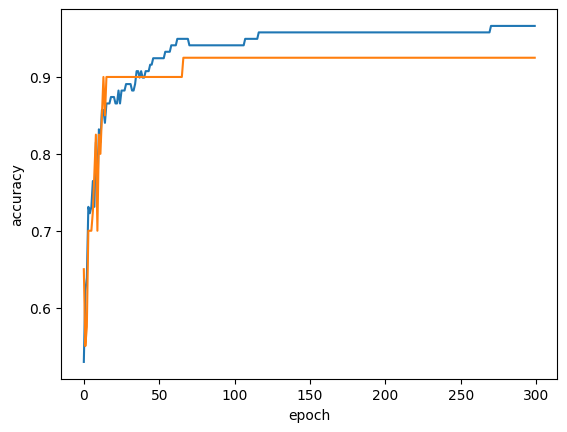

In [62]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

100번 이후 test와 train이 벌어지고 있다.

100번이 적절한 epoch

In [ ]:
sc = SGDClassifier(loss = 'log_loss', max_iter=100, tol=None, random_state=42) # tol=None; 자동으로 멈추지 않고 100만큼 무조건 반복하기
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


**Hinge 손실(Support Vector Machine)**

: 이진 분류에서 효과적이며, 힌지 손실(Hinge Loss)을 기반으로 작동한다. SVM의 기본 아이디어는 결정 경계(Decision Boundary)를 설정하여 데이터를 두 클래스로 구분하는 것이다. 이때 결정 경계는 마진을 최대화하는 방식으로 설정된다.


서포트 벡터(Support Vectors): 서포트 벡터는 결정 경계와 가장 가까운 데이터 point들이다. 

힌지 손실(Hinge Loss): SVM의 손실 함수는 힌지 손실이라고 불리며, 이를 통해 모델의 예측이 얼마나 정확한지, 또는 얼마나 잘 분리되어 있는지 측정한다.

힌지 손실 함수는 잘못 분류된 데이터 포인트에 대해 패널티를 부여한다.